<a href="https://colab.research.google.com/github/HarshilGem/pro_t3/blob/main/RTA_task_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#dataset

#data-source: https://www.kaggle.com/datasets/saurabhshahane/road-traffic-accidents

In [2]:
import pandas as pd

# Load the dataset
# Assuming the dataset is loaded from a CSV file named 'traffic_accidents.csv'
df = pd.read_csv('/content/RTA Dataset.csv')

# Display the first few rows and basic information about the dataset
print(df.head())
print(df.info())


       Time Day_of_week Age_band_of_driver Sex_of_driver   Educational_level  \
0  17:02:00      Monday              18-30          Male   Above high school   
1  17:02:00      Monday              31-50          Male  Junior high school   
2  17:02:00      Monday              18-30          Male  Junior high school   
3   1:06:00      Sunday              18-30          Male  Junior high school   
4   1:06:00      Sunday              18-30          Male  Junior high school   

  Vehicle_driver_relation Driving_experience      Type_of_vehicle  \
0                Employee              1-2yr           Automobile   
1                Employee         Above 10yr  Public (> 45 seats)   
2                Employee              1-2yr      Lorry (41?100Q)   
3                Employee             5-10yr  Public (> 45 seats)   
4                Employee              2-5yr                  NaN   

  Owner_of_vehicle Service_year_of_vehicle  ... Vehicle_movement  \
0            Owner              Abov

In [ ]:
# handling missing value

In [4]:
# Columns with missing values
columns_with_missing = [
    'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
    'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
    'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
    'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
    'Work_of_casuality', 'Fitness_of_casuality'
]

# Handle missing values in categorical columns (fill with mode)
for col in columns_with_missing:
    if df[col].dtype == 'object':  # Check if column is categorical (object type)
        mode_val = df[col].mode()[0]  # Calculate mode
        df[col].fillna(mode_val, inplace=True)  # Fill missing values with mode

# Handle missing values in numerical column (fill with median)

# Verify that all missing values have been handled
print("After handling missing values:")
print(df.isnull().sum())

# Display the first few rows and basic information about the dataset after handling missing values
print("\nFirst few rows of the dataset after handling missing values:")
print(df.head())

print("\nInformation about the dataset after handling missing values:")
print(df.info())

After handling missing values:
Time                             0
Day_of_week                      0
Age_band_of_driver               0
Sex_of_driver                    0
Educational_level                0
Vehicle_driver_relation          0
Driving_experience               0
Type_of_vehicle                  0
Owner_of_vehicle                 0
Service_year_of_vehicle          0
Defect_of_vehicle                0
Area_accident_occured            0
Lanes_or_Medians                 0
Road_allignment                  0
Types_of_Junction                0
Road_surface_type                0
Road_surface_conditions          0
Light_conditions                 0
Weather_conditions               0
Type_of_collision              155
Number_of_vehicles_involved      0
Number_of_casualties             0
Vehicle_movement               308
Casualty_class                   0
Sex_of_casualty                  0
Age_band_of_casualty             0
Casualty_severity                0
Work_of_casuality       

In [ ]:
# analysis of all condition

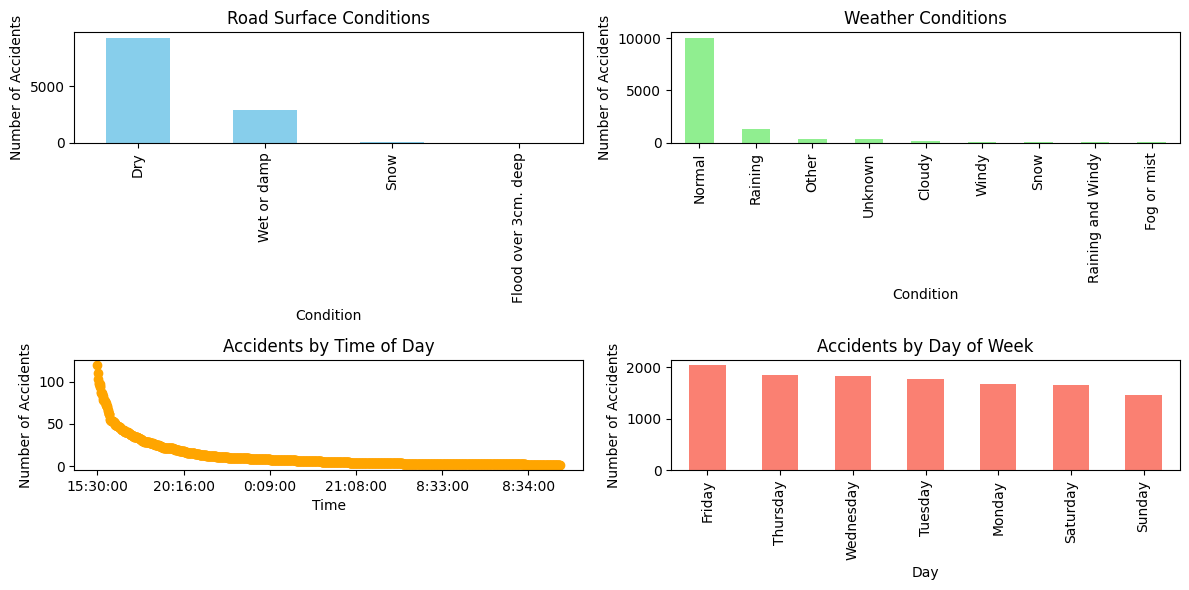

In [5]:
# Analyze road conditions
road_condition_counts = df['Road_surface_conditions'].value_counts()

# Analyze weather conditions
weather_counts = df['Weather_conditions'].value_counts()

# Analyze time of day
time_counts = df['Time'].value_counts()
day_counts = df['Day_of_week'].value_counts()

# Visualize patterns (using matplotlib or seaborn)
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Example 1: Road Surface Conditions
plt.subplot(2, 2, 1)
road_condition_counts.plot(kind='bar', color='skyblue')
plt.title('Road Surface Conditions')
plt.xlabel('Condition')
plt.ylabel('Number of Accidents')

# Example 2: Weather Conditions
plt.subplot(2, 2, 2)
weather_counts.plot(kind='bar', color='lightgreen')
plt.title('Weather Conditions')
plt.xlabel('Condition')
plt.ylabel('Number of Accidents')

# Example 3: Time of Day
plt.subplot(2, 2, 3)
time_counts.plot(kind='line', marker='o', color='orange')
plt.title('Accidents by Time of Day')
plt.xlabel('Time')
plt.ylabel('Number of Accidents')

# Example 4: Day of Week
plt.subplot(2, 2, 4)
day_counts.plot(kind='bar', color='salmon')
plt.title('Accidents by Day of Week')
plt.xlabel('Day')
plt.ylabel('Number of Accidents')

plt.tight_layout()
plt.show()


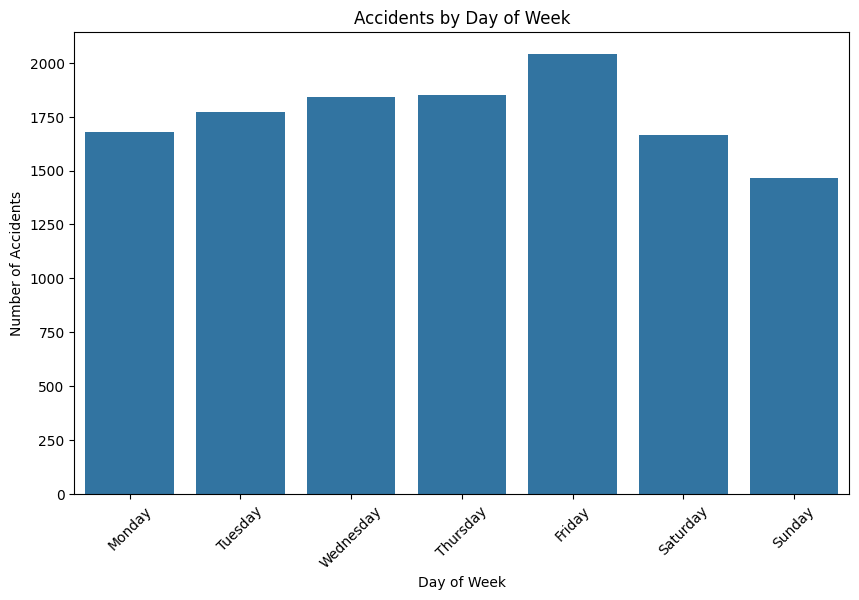

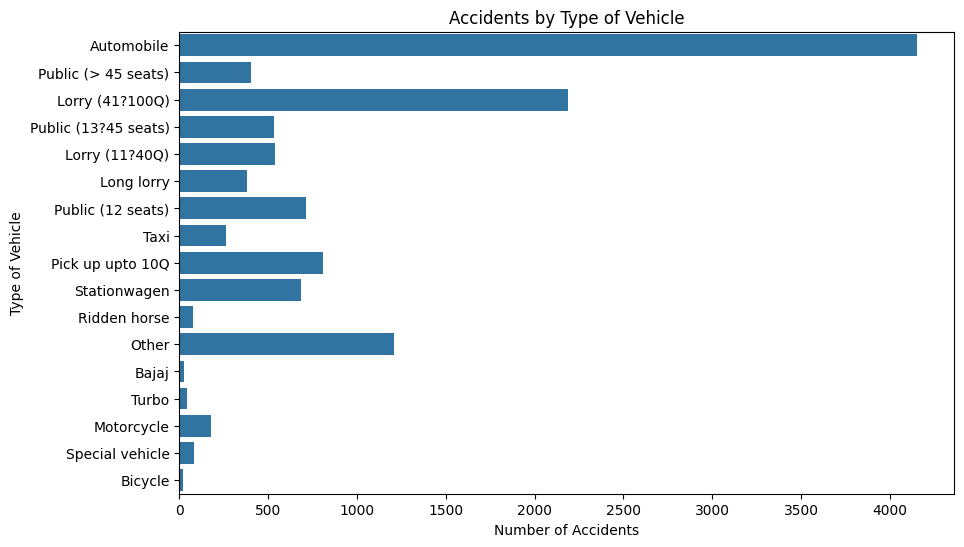

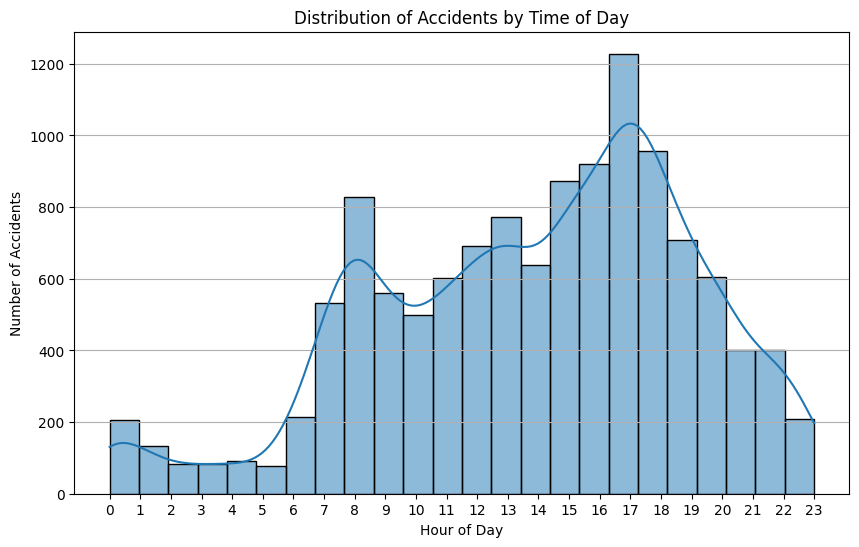

In [9]:
# Plot accidents by day of week
import seaborn as sns
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Day_of_week', order=day_order)
plt.title('Accidents by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

# Plot accidents by type of vehicle
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='Type_of_vehicle')
plt.title('Accidents by Type of Vehicle')
plt.xlabel('Number of Accidents')
plt.ylabel('Type of Vehicle')
plt.show()

# Convert Time column to datetime format
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.hour

# Plot accidents by time of day
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Time', bins=24, kde=True)
plt.title('Distribution of Accidents by Time of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Accidents')
plt.xticks(range(0, 24))
plt.grid(axis='y')
plt.show()



In [11]:
# Handle specific columns with null values
import numpy as np
def replace_na_with_avg(df, column_name, window=10):
    # Convert column to numeric (ignore errors to handle 'na')
    df[column_name] = pd.to_numeric(df[column_name], errors='coerce')

    # Find indices of 'na'
    na_indices = df.index[df[column_name].isna()]

    # Iterate over 'na' indices and replace with average of surrounding values
    for idx in na_indices:
        lower_bound = max(0, idx - window)
        upper_bound = min(len(df[column_name]) - 1, idx + window)
        lower_avg = np.nanmean(df.iloc[lower_bound:idx][column_name].values)
        upper_avg = np.nanmean(df.iloc[idx+1:upper_bound+1][column_name].values)
        avg_value = np.nanmean([lower_avg, upper_avg])
        df.at[idx, column_name] = avg_value

    return df

# Apply the function to handle 'Age_band_of_casualty' column
df = replace_na_with_avg(df, 'Age_band_of_casualty')

# Check again for null values after handling
print("\nTotal NaNs after handling:")
print(df.isnull().sum())

<ipython-input-11-e1276f40a47f>:14: RuntimeWarning: Mean of empty slice
  lower_avg = np.nanmean(df.iloc[lower_bound:idx][column_name].values)
<ipython-input-11-e1276f40a47f>:15: RuntimeWarning: Mean of empty slice
  upper_avg = np.nanmean(df.iloc[idx+1:upper_bound+1][column_name].values)
<ipython-input-11-e1276f40a47f>:16: RuntimeWarning: Mean of empty slice
  avg_value = np.nanmean([lower_avg, upper_avg])



Total NaNs after handling:
Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level                 0
Vehicle_driver_relation           0
Driving_experience                0
Type_of_vehicle                   0
Owner_of_vehicle                  0
Service_year_of_vehicle           0
Defect_of_vehicle                 0
Area_accident_occured             0
Lanes_or_Medians                  0
Road_allignment                   0
Types_of_Junction                 0
Road_surface_type                 0
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty           3164
Casualty_severity                 0
